<a href="https://colab.research.google.com/github/ABHINAV-GOPINADH/deep_Learning/blob/main/demo_gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install -q transformers torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 140.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Step 1 : Prepare Dataset

In [2]:
dataset = [
    {
        "id": "doc1",
        "sentences": [
            {"text": "Alice moves to a new town.", "label": 0},
            {"text": "She joins a new school.", "label": 0},
            {"text": "She discovers her magical powers.", "label": 1}
        ]
    },
    {
        "id": "doc2",
        "sentences": [
            {"text": "A virus spreads across the city.", "label": 0},
            {"text": "The hero develops a cure.", "label": 1}
        ]
    },
    {
        "id": "doc3",
        "sentences": [
            {"text": "Bob is a secret agent.", "label": 0},
            {"text": "He is betrayed by his team.", "label": 1},
            {"text": "He fakes his death.", "label": 1}
        ]
    },
    {
        "id": "doc4",
        "sentences": [
            {"text": "Two friends start a business together.", "label": 0},
            {"text": "One partner cheats the other.", "label": 1},
            {"text": "Their friendship ends in a lawsuit.", "label": 1}
        ]
    },
    {
        "id": "doc5",
        "sentences": [
            {"text": "Lara goes on a treasure hunt.", "label": 0},
            {"text": "She finds her long-lost father.", "label": 1},
            {"text": "They escape from the collapsing cave.", "label": 1}
        ]
    },
    {
        "id": "doc6",
        "sentences": [
            {"text": "Jake starts his first day at college.", "label": 0},
            {"text": "He meets Emma in the library.", "label": 0},
            {"text": "Emma turns out to be his half-sister.", "label": 1}
        ]
    },
    {
        "id": "doc7",
        "sentences": [
            {"text": "A spaceship crashes on a deserted planet.", "label": 0},
            {"text": "The survivors realize they are not alone.", "label": 1},
            {"text": "An alien species begins to hunt them.", "label": 1}
        ]
    },
    {
        "id": "doc8",
        "sentences": [
            {"text": "A detective investigates a string of murders.", "label": 0},
            {"text": "The killer leaves cryptic notes.", "label": 0},
            {"text": "The detective’s own son is the killer.", "label": 1}
        ]
    },
    {
        "id": "doc9",
        "sentences": [
            {"text": "Sarah starts receiving mysterious letters.", "label": 0},
            {"text": "She thinks they’re from a secret admirer.", "label": 0},
            {"text": "They are actually from her stalker.", "label": 1}
        ]
    },
    {
        "id": "doc10",
        "sentences": [
            {"text": "Tom inherits a haunted mansion.", "label": 0},
            {"text": "He plans to sell it.", "label": 0},
            {"text": "He discovers he’s the reincarnation of the ghost.", "label": 1}
        ]
    }
]


Step 2: Generate BERT Embeddings

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

def get_sentence_embedding(sentence):
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    embeddings = output.last_hidden_state.mean(dim=1)  # Average pooling
    return embeddings.squeeze(0)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Step 3 : Create Graphs

In [4]:
from torch_geometric.data import Data
import torch.nn.functional as F

graph_list = []

for doc in dataset:
    sentences = doc["sentences"]
    num_nodes = len(sentences)

    # Node features (BERT)
    x = torch.stack([get_sentence_embedding(s["text"]) for s in sentences])

    # Labels
    y = torch.tensor([s["label"] for s in sentences], dtype=torch.long)

    # Edges: connect consecutive sentences (bidirectional)
    edge_index = []
    for i in range(num_nodes - 1):
        edge_index.append([i, i+1])
        edge_index.append([i+1, i])
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    graph = Data(x=x, edge_index=edge_index, y=y)
    graph_list.append(graph)


Step 4: Train a GCN Model

In [5]:
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

model = GCN(in_channels=384, hidden_channels=128, out_channels=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

loader = DataLoader(graph_list, batch_size=1, shuffle=True)


 Step 5 : Train

In [6]:
for epoch in range(20):
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 7.6593
Epoch 2, Loss: 14.0680
Epoch 3, Loss: 7.9274
Epoch 4, Loss: 6.2053
Epoch 5, Loss: 5.7609
Epoch 6, Loss: 5.1634
Epoch 7, Loss: 4.6372
Epoch 8, Loss: 4.1924
Epoch 9, Loss: 3.8488
Epoch 10, Loss: 3.9603
Epoch 11, Loss: 5.2576
Epoch 12, Loss: 7.4197
Epoch 13, Loss: 4.5095
Epoch 14, Loss: 3.9759
Epoch 15, Loss: 3.2063
Epoch 16, Loss: 2.9728
Epoch 17, Loss: 2.5478
Epoch 18, Loss: 2.1146
Epoch 19, Loss: 1.7856
Epoch 20, Loss: 1.8660


Step 6: Test on Same Data

In [8]:
model.eval()
for i, graph in enumerate(graph_list):
    out = model(graph.x, graph.edge_index)
    pred = out.argmax(dim=1)
    print(f"\nDocument {i+1}:")
    for j, s in enumerate(dataset[i]["sentences"]):
        label = "Spoiler" if pred[j] == 1 else "Non-Spoiler"
        print(f"  - {s['text']} → {label}")



Document 1:
  - Alice moves to a new town. → Non-Spoiler
  - She joins a new school. → Non-Spoiler
  - She discovers her magical powers. → Spoiler

Document 2:
  - A virus spreads across the city. → Spoiler
  - The hero develops a cure. → Spoiler

Document 3:
  - Bob is a secret agent. → Non-Spoiler
  - He is betrayed by his team. → Spoiler
  - He fakes his death. → Spoiler

Document 4:
  - Two friends start a business together. → Non-Spoiler
  - One partner cheats the other. → Spoiler
  - Their friendship ends in a lawsuit. → Spoiler

Document 5:
  - Lara goes on a treasure hunt. → Non-Spoiler
  - She finds her long-lost father. → Spoiler
  - They escape from the collapsing cave. → Spoiler

Document 6:
  - Jake starts his first day at college. → Non-Spoiler
  - He meets Emma in the library. → Non-Spoiler
  - Emma turns out to be his half-sister. → Spoiler

Document 7:
  - A spaceship crashes on a deserted planet. → Non-Spoiler
  - The survivors realize they are not alone. → Spoiler
 

In [9]:
from sklearn.metrics import classification_report

all_preds = []
all_labels = []

for i, graph in enumerate(graph_list):
    out = model(graph.x, graph.edge_index)
    pred = out.argmax(dim=1).tolist()
    true = [s["label"] for s in dataset[i]["sentences"]]

    all_preds.extend(pred)
    all_labels.extend(true)

print(classification_report(all_labels, all_preds, target_names=["Non-Spoiler", "Spoiler"]))


              precision    recall  f1-score   support

 Non-Spoiler       1.00      0.87      0.93        15
     Spoiler       0.88      1.00      0.93        14

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



In [10]:
!pip install networkx matplotlib


              precision    recall  f1-score   support

 Non-Spoiler       1.00      0.87      0.93        15
     Spoiler       0.88      1.00      0.93        14

    accuracy                           0.93        29
   macro avg       0.94      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



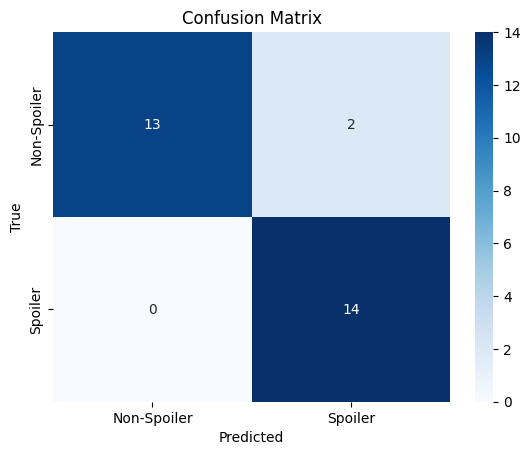

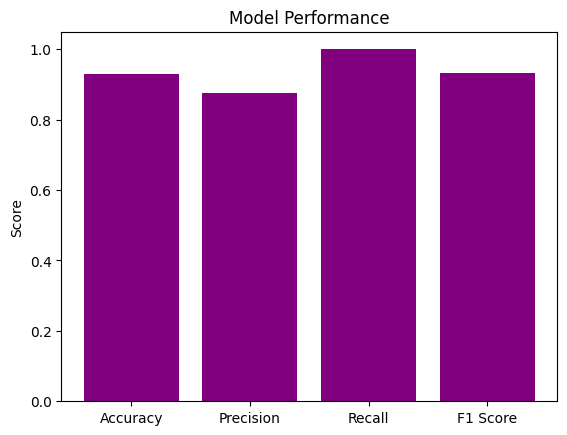

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Collect all predictions and labels across documents
all_preds = []
all_labels = []

model.eval()
for i, graph in enumerate(graph_list):
    out = model(graph.x, graph.edge_index)
    pred = out.argmax(dim=1).cpu().numpy()
    label = [s["label"] for s in dataset[i]["sentences"]]
    all_preds.extend(pred)
    all_labels.extend(label)

# Print metrics
report = classification_report(all_labels, all_preds, target_names=["Non-Spoiler", "Spoiler"])
print(report)

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Spoiler", "Spoiler"], yticklabels=["Non-Spoiler", "Spoiler"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Bar chart of accuracy/f1
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

plt.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [accuracy, precision, recall, f1], color='purple')
plt.ylim(0, 1.05)
plt.title("Model Performance")
plt.ylabel("Score")
plt.show()


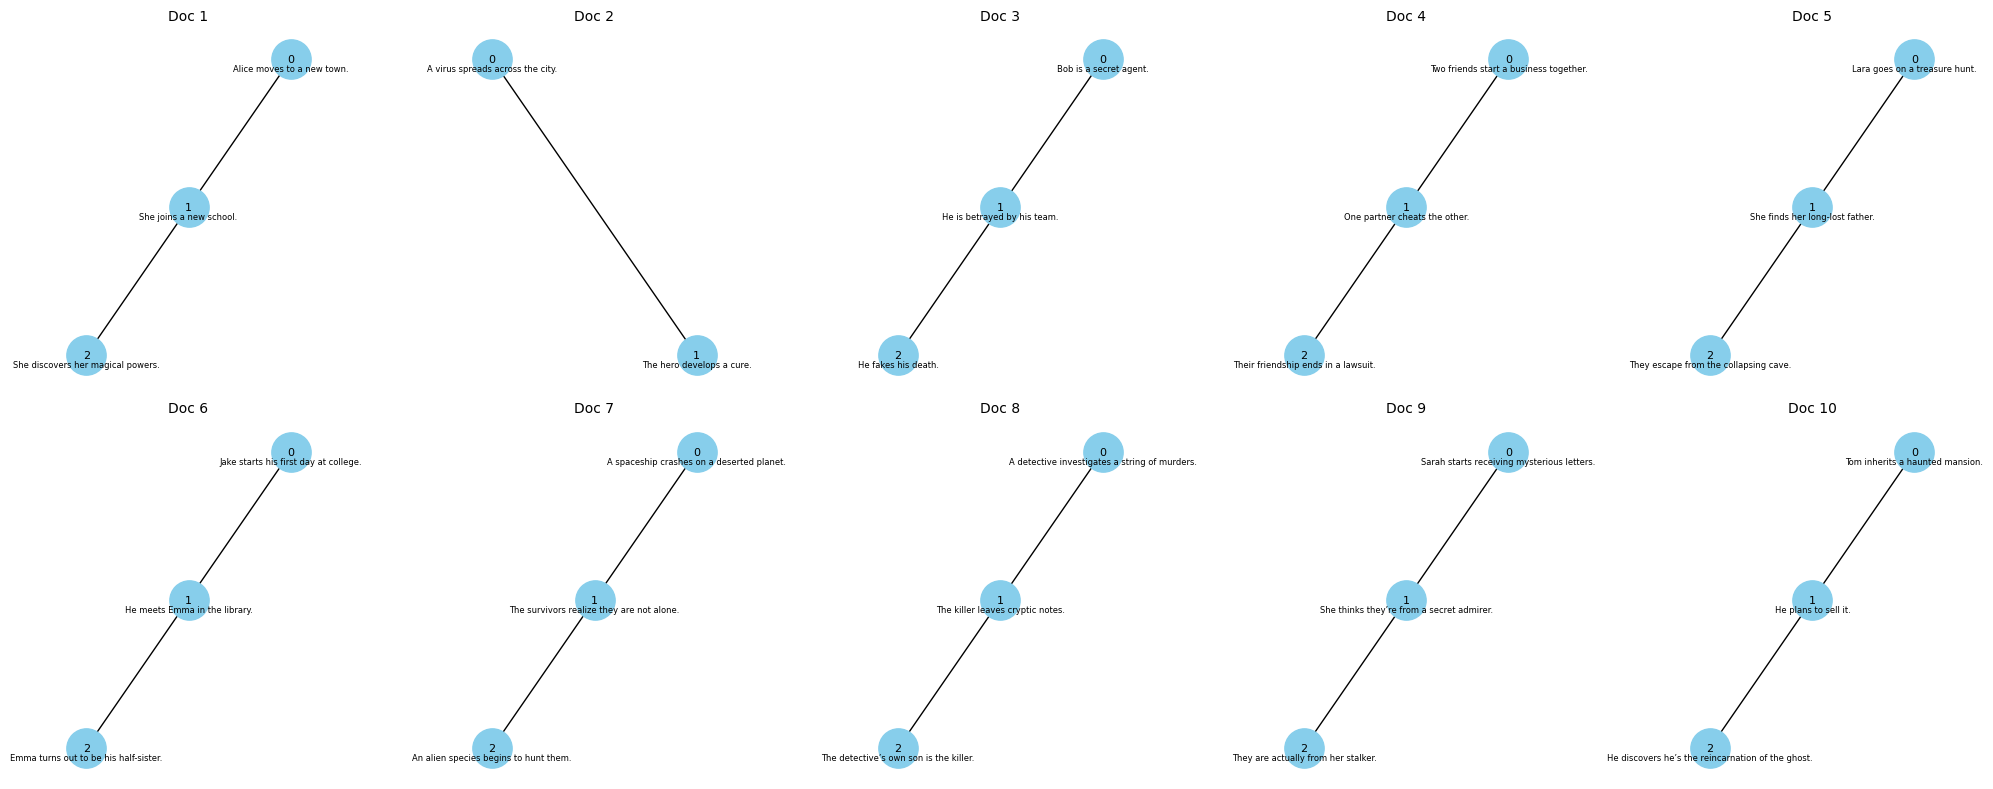

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_structure(ax, graph, sentences, doc_id):
    G = nx.Graph()

    for i in range(len(sentences)):
        G.add_node(i, text=sentences[i]["text"])

    edge_index = graph.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        u, v = edge_index[:, i]
        G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)

    # Draw edges and nodes
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=800, ax=ax)
    nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in G.nodes()}, font_size=8, ax=ax)

    # Annotate with sentence text
    for i, p in pos.items():
        ax.text(p[0], p[1] - 0.08, sentences[i]["text"], ha='center', fontsize=6, wrap=True)

    ax.set_title(f"Doc {doc_id+1}", fontsize=10)
    ax.axis('off')

# Set up 2 rows x 5 columns plot
num_docs = len(graph_list)
rows, cols = 2, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 8))
axs = axs.flatten()

# Plot each document
for i in range(min(num_docs, rows * cols)):
    plot_graph_structure(axs[i], graph_list[i], dataset[i]["sentences"], i)

# Turn off extra subplots if any
for j in range(num_docs, rows * cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [15]:
new_doc = {
    "sentences": [
        {"text": "Harry finds the locket in the forest."},
        {"text": "They try to destroy the Horcrux."},
        {"text": "Ron leaves them in frustration."},
        {"text": "Later, he returns and saves Harry."}
    ]
}


In [16]:
from sentence_transformers import SentenceTransformer
import torch
from torch_geometric.data import Data
import numpy as np

# Assuming same model used before
embedder = SentenceTransformer("all-MiniLM-L6-v2")
texts = [s["text"] for s in new_doc["sentences"]]
embeddings = embedder.encode(texts)
x = torch.tensor(embeddings, dtype=torch.float)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
edge_index = []
for i in range(len(texts) - 1):
    edge_index.append([i, i+1])
    edge_index.append([i+1, i])

edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()


In [18]:
new_graph = Data(x=x, edge_index=edge_index)


In [19]:
model.eval()
with torch.no_grad():
    output = model(new_graph.x, new_graph.edge_index)
    predictions = output.argmax(dim=1)


In [20]:
for i, sentence in enumerate(texts):
    label = "Spoiler" if predictions[i].item() == 1 else "Non-Spoiler"
    print(f"{sentence} → {label}")


Harry finds the locket in the forest. → Spoiler
They try to destroy the Horcrux. → Spoiler
Ron leaves them in frustration. → Spoiler
Later, he returns and saves Harry. → Spoiler
